# 사회적 거리두기가 코로나19 전파에 주는 영향

*  SEIR 

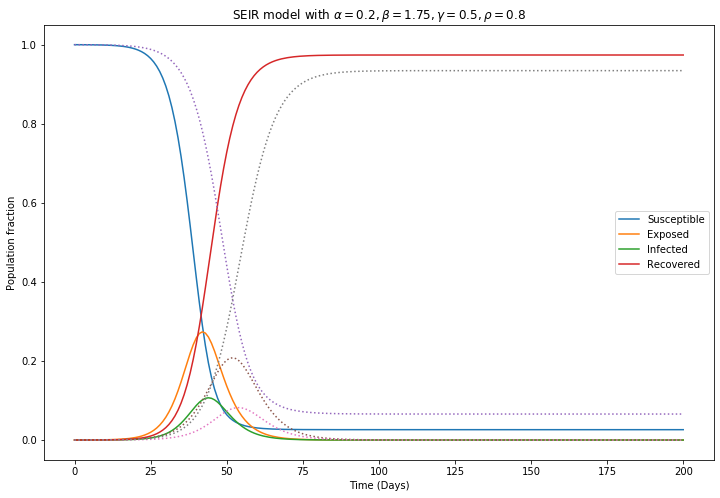

In [54]:
# SEIR model
# semi-implicit Euler method
# Christian Hubbs의 글을 참고해서 모델을 구현하고 플로팅을 추가했습니다.
# (https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296)

import numpy as np
import matplotlib.pyplot as plt

def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T


t_max = 200
dt = 1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho = 0.8
params_base = alpha, beta, gamma
params_soc = alpha, beta, gamma, rho
# Run simulation
results_base = base_seir_model(init_vals, params_base, t)
results_soc = seir_model_with_soc_dist(init_vals, params_soc, t)

# Plot results
plt.figure(figsize=(12,8))
plt.plot(results_base)
plt.plot(results_soc, linestyle=':')
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
plt.xlabel('Time (Days)')
plt.ylabel('Population fraction')
plt.title(r'SEIR model with $\alpha={p[0]}, \beta={p[1]}, \gamma={p[2]}, \rho={p[3]}$'.format(p=params_soc) )
plt.show()

In [49]:
# Drop ratio of Exposed: with soc vs base
r_E = results_soc[:,1].max() / results_base[:,1].max()
1-r_E

0.23380988793745305

In [52]:
# Drop ratio of Infected: with soc vs base
r_I = results_soc[:,2].max() / results_base[:,2].max()
1-r_I

0.22279100659793027